In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Field goal rate data. Each tuple contains (field goals made, field goals attempted).
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13)],
}

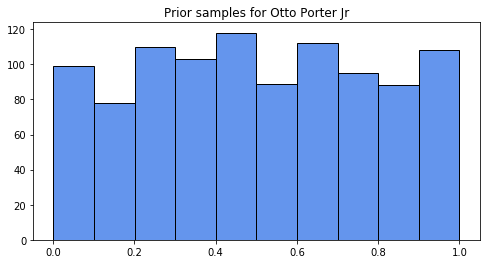

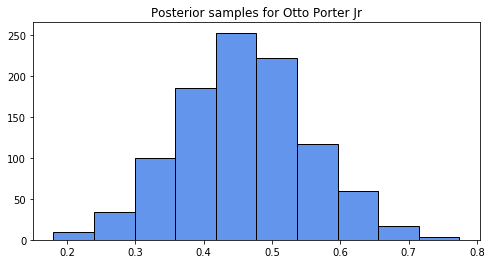

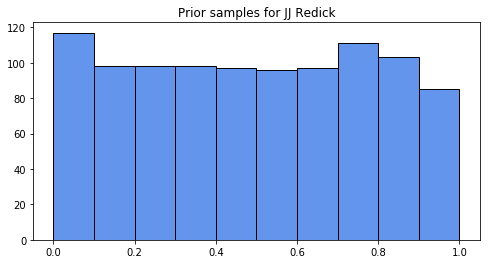

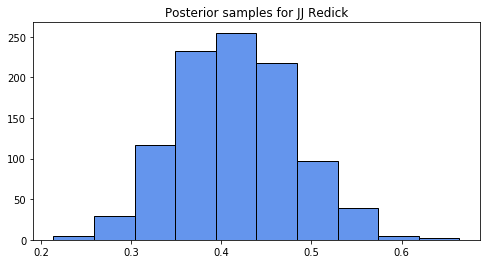

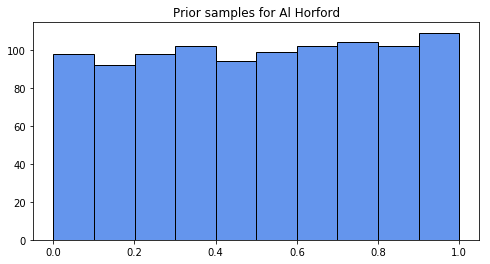

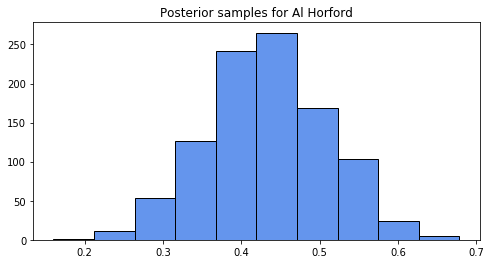

In [7]:
for player in player_field_goal_data.keys():
    
    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = sts.beta.rvs(alpha_prior, beta_prior, size=1000)

    # Likelihood: Binomial distribution
    total_successes = sum(game[0] for game in player_field_goal_data[player])
    total_failures = sum(game[1] - game[0] for game in player_field_goal_data[player])

    # Posterior: Beta distribution
    alpha_post = alpha_prior + total_successes
    beta_post = beta_prior + total_failures
    posterior_field_goal_rate = sts.beta.rvs(alpha_post, beta_post, size=1000)

    plt.figure(figsize=(8,4))
    plt.title('Prior samples for ' + player)
    plt.hist(prior_field_goal_rate, edgecolor='black', color='cornflowerblue')
    
    plt.figure(figsize=(8,4))
    plt.title('Posterior samples for ' + player)
    plt.hist(posterior_field_goal_rate, edgecolor='black', color='cornflowerblue')

plt.show()